# Part A - Exploratory Data Analysis 
## 1. Load and explore the dataset

In [126]:
import pandas as pd

df = pd.read_csv("./Dataset/zomato_df_final_data.csv", header=0)
df.head(5)

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [127]:
df.shape

(10500, 17)

In [128]:
# Check missing values
missing_count = df.isna().sum().sort_values(ascending=False)
missing_count

rating_text      3316
rating_number    3316
votes            3316
cost_2            346
cost              346
lat               192
lng               192
type               48
color               0
groupon             0
address             0
title               0
subzone             0
phone               0
link                0
cuisine             0
cuisine_color       0
dtype: int64

In [129]:
missing_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)

missing_summary = (
    pd.concat([missing_count, missing_pct], axis=1)
      .rename(columns={0: "missing_count", 1: "missing_pct"})
)
missing_summary.head(10)  # top 10 with most missing

,missing_count,missing_pct
rating_text,3316,31.58
rating_number,3316,31.58
votes,3316,31.58
cost_2,346,3.30
cost,346,3.30
lat,192,1.83
lng,192,1.83
type,48,0.46
color,0,0.00
groupon,0,0.00


In [130]:
# check data types
#df.dtypes
df.info()
#df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [131]:
#Summary statistics (numeric)
df.describe().T  # transpose for readability

,count,mean,std,min,25%,50%,75%,max
cost,10154.0,51.153240,27.799485,8.000000,30.000000,45.000000,60.000000,500.000000
lat,10308.0,-32.921377,8.263449,-37.858473,-33.899094,-33.872741,-33.813451,51.500986
lng,10308.0,148.067359,26.695402,-123.270371,151.061061,151.172468,151.208940,152.869052
rating_number,7184.0,3.283672,0.454580,1.800000,3.000000,3.300000,3.600000,4.900000
votes,7184.0,83.581013,175.117966,4.000000,12.000000,32.000000,87.000000,3236.000000
cost_2,10154.0,5.332974,2.147115,2.000000,3.699187,4.857724,6.016260,40.000000


## Insights

#### Shape and missing values

* Shape: 10,500 rows × 17 columns
* Columns with the highest number of missing values are: rating_text, rating_number, and votes; each missing in 3316 rows (~31.6%). This may bias any analysis relying on reviews/ratings. Options for dealing with the NAs: imputation, filtering, or using other proxies.
* Nearly a third of the dataset lacks rating/vote information.
* cost and cost_2: each missing in 346 rows. That’s moderate (a few %).
* lat and lng: each missing in 192 rows which is relatively small.
* type: only 48 missing.
* All other columns (color, groupon, address, title, subzone, phone, link, cuisine, cuisine_color) have no missing values.

#### Datatypes

* Numeric (float64): cost, lat, lng, rating_number, votes, cost_2
* Categorical/text (object): address, cuisine, link, phone, rating_text, subzone, title, type, color, cuisine_color
* Boolean: groupon
* Memory usage ~ 1.3 MB, which is lightweight
* Summarises dtype distribution:

    object: 10 columns (string-like, categorical, text).

    float64: 6 columns (numerical, continuous).

    bool: 1 column (groupon).
* Useful to quickly know what fraction of your dataset is categorical vs numeric

#### Summary Stats

1. Cost

    * Mean: ~51 AUD (for two people).
    * Median (50%): 45 AUD which suggests slight right-skew (some expensive restaurants pulling the mean up)
    * Range: 8 to 500 AUD which indicates wide spread, with some very expensive outliers

2. Latitude & Longitude

    * lat mean: ~ -32.92,
    * lng mean: ~ 148.07.
    (Sydneys geolocation)

3. Rating Number

    * Mean: ~3.28
    * Range: 1.8 to 4.9; reasonable for a 1–5 rating scale.
    * Distribution: fairly tight (std = 0.45) which indicates ratings don’t vary wildly

4. Votes

    * Mean: ~84 votes.
    * Median: 32 votes → heavily right-skewed (most restaurants have few votes, some very popular ones with thousands).
    * Max: 3236 votes → clear outliers (well-known places).

5. Cost_2

    * Mean ~5.33, median ~4.86.
    * Likely a derived feature (maybe log-transformed or cost in a different unit).

Still shows right skew (max = 40 while median ≈ 5).

#### Key Insights

- Cost and votes are right-skewed which indicates many affordable restaurants, fewer premium highly-rated ones
- Lat/lng contain errors, some restaurants geocoded outside Sydney
- Ratings are fairly consistent, with most restaurants scoring ~3–4
- Cost_2 likely derived which could be useful for normalization

## 2. Answer the following with plots/graphs, and description:
### Q1: How many unique cuisines are served?

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

df["cuisine_list"] = (
    df["cuisine"]
      .fillna("")                       # replace NaN with empty string
      .astype(str)                      # ensure it's a string
      .apply(lambda s: [c.strip() for c in s.split(",") if c.strip()])
)

Number of unique cuisines: 426


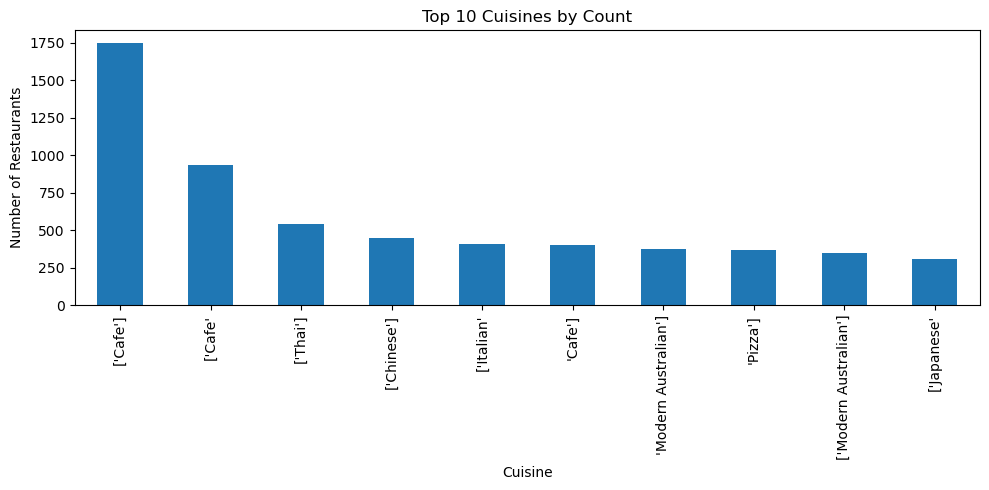

In [133]:
# Unique cuisines
unique_cuisines = sorted({c for lst in df["cuisine_list"] for c in lst})
print("Number of unique cuisines:", len(unique_cuisines))

# Top 20 cuisines bar chart
cuisine_counts = pd.Series([c for lst in df["cuisine_list"] for c in lst]).value_counts()
top_n = 10
plt.figure(figsize=(10,5))
cuisine_counts.head(top_n).plot(kind="bar")
plt.title(f"Top {top_n} Cuisines by Count")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


### Ans:
There are 426 distinct cuisines in raw form, but some are duplicates due to formatting inconsistencies. After cleaning, the number would be slightly lower and more accurate.

The bar chart shows the Top 10 cuisines by restaurant count in the dataset.

x-axis = Cuisine name, y-axis = Number of restaurants serving that cuisine.

From the chart:

* Cafe dominates by far, with ~1,750 restaurants.

* Next most common is again a variant of Cafe (like 'Cafe', "['Cafe']"): this suggests some data cleaning is needed (quotes/brackets show inconsistent formatting).

* Other popular cuisines include Thai, Chinese, Italian, Modern Australian, Pizza, Japanese.

**Insight**: Cafe-style food is the most prevalent, but inconsistent labeling (e.g., ['Cafe'], 'Cafe', Cafe) inflates the count. Cleaning the cuisine names (removing stray quotes/brackets) would give a clearer picture.

### Q2: Which 3 suburbs have the most restaurants?

Top 3 suburbs by restaurant count:
subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


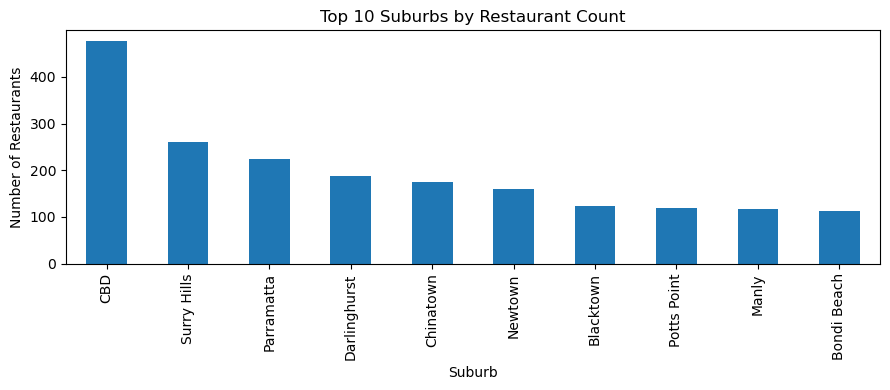

In [134]:
suburb_counts = df["subzone"].value_counts()
top3 = suburb_counts.head(3)
print("Top 3 suburbs by restaurant count:")
print(top3)

# Bar chart (show top 10 for context)
plt.figure(figsize=(9,4))
suburb_counts.head(10).plot(kind="bar")
plt.title("Top 10 Suburbs by Restaurant Count")
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()


### Ans:

Top 3 suburbs by restaurant count

CBD: 476 restaurants

Surry Hills: 260 restaurants

Parramatta: 225 restaurants

These suburbs represent the highest number of restaurants in the dataset.

The **bar chart** visualizes the distribution of restaurants across the 10 busiest suburbs.

* CBD dominates heavily, with nearly double the number of restaurants compared to the next suburb.
* Surry Hills and Parramatta are strong secondary hubs.
* Suburbs like Darlinghurst, Chinatown, and Newtown also show significant restaurant presence.
* Outer or lifestyle-oriented areas like Blacktown, Potts Point, Manly, and Bondi Beach have fewer but still notable restaurant counts.

**Insight**: Sydney’s central business district (CBD) is the primary location for restaurants, likely due to high traffic and business activity. Surrounding suburbs (Surry Hills, Parramatta, Darlinghurst) are also popular dining areas, while Manly and Bondi Beach host fewer but strategically important restaurants due to their iconic lifestyle and destinations.

### Q3: Are restaurants with“Excellent”ratings more expensive than those with“Poor”ratings? Support with visuals (histograms or stacked bars).

             count    mean  median
rating_text                       
Excellent       51  101.67    60.0
Poor           201   55.85    50.0


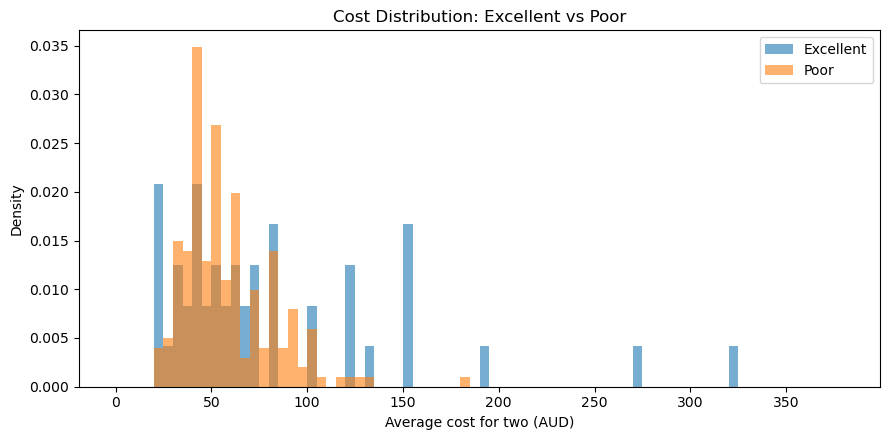

In [135]:
# Filter to the two rating groups
mask = df["rating_text"].isin(["Excellent", "Poor"])
comp = df.loc[mask, ["rating_text", "cost"]].dropna()

# numeric comparison
group_stats = comp.groupby("rating_text")["cost"].agg(["count", "mean", "median"]).round(2)
print(group_stats)

bins = np.arange(0, max(100, np.nanpercentile(comp["cost"], 99)) + 5, 5)  

plt.figure(figsize=(9,4.5))
for label, color, alpha in [("Excellent", None, 0.6), ("Poor", None, 0.6)]:
    plt.hist(
        comp.loc[comp["rating_text"] == label, "cost"],
        bins=bins, density=True, histtype="stepfilled", alpha=alpha, label=label
    )

plt.title("Cost Distribution: Excellent vs Poor")
plt.xlabel("Average cost for two (AUD)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

### Ans:
From the table we can see that, 
- Restaurants rated “Excellent” have a higher average cost (≈102 AUD) compared to “Poor” restaurants (≈56 AUD).
- Median also confirms this trend: 60 vs 50 AUD.
- Although both groups overlap, Excellent-rated restaurants are generally more expensive.

The histogram shows the distribution of average cost for two:

- Orange (Poor) restaurants are concentrated in the low-cost range (20–70 AUD), peaking around 40–50 AUD.
- Blue (Excellent) restaurants are spread wider, with many still around 40–70 AUD, but noticeably more extending into higher cost ranges (100–200+ AUD).
- A few “Excellent” restaurants reach extreme costs (over 300 AUD), which lifts the mean.
- The distributions overlap at lower price points, but the Excellent group skews more to the right (higher cost tail).

Overall, restaurants with “Excellent” ratings tend to be more expensive than those with “Poor” ratings. Both the summary statistics (higher mean & median cost) and the histogram (wider spread into higher price ranges for Excellent) support this conclusion.

## Explore key variables
### Distribution of cost, ratings, and restaurant types

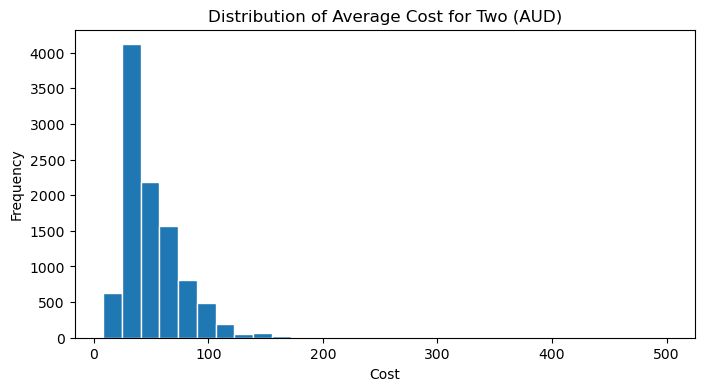

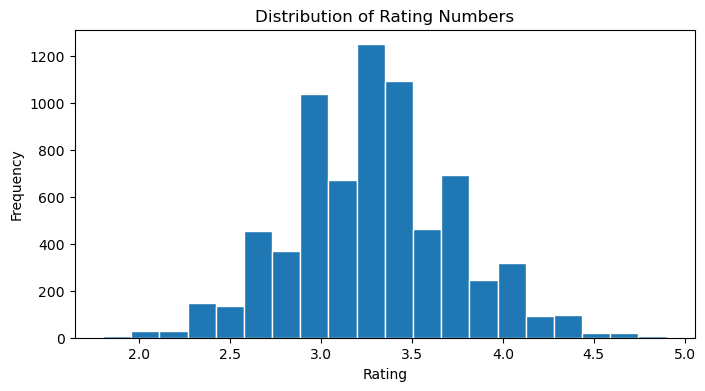

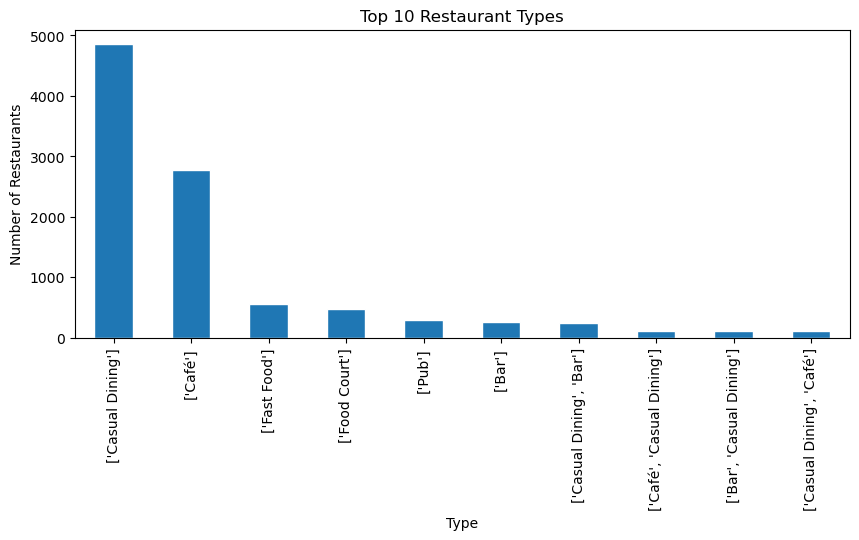

In [136]:
import matplotlib.pyplot as plt

# Distribution of Cost 
plt.figure(figsize=(8,4))
df["cost"].dropna().plot(kind="hist", bins=30, edgecolor="white")
plt.title("Distribution of Average Cost for Two (AUD)")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

# Distribution of Rating Number 
plt.figure(figsize=(8,4))
df["rating_number"].dropna().plot(kind="hist", bins=20, edgecolor="white")
plt.title("Distribution of Rating Numbers")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Restaurant Types
plt.figure(figsize=(10,4))
df["type"].value_counts().head(10).plot(kind="bar", edgecolor="white")
plt.title("Top 10 Restaurant Types")
plt.xlabel("Type")
plt.ylabel("Number of Restaurants")
plt.show()


### Correlation between cost and votes

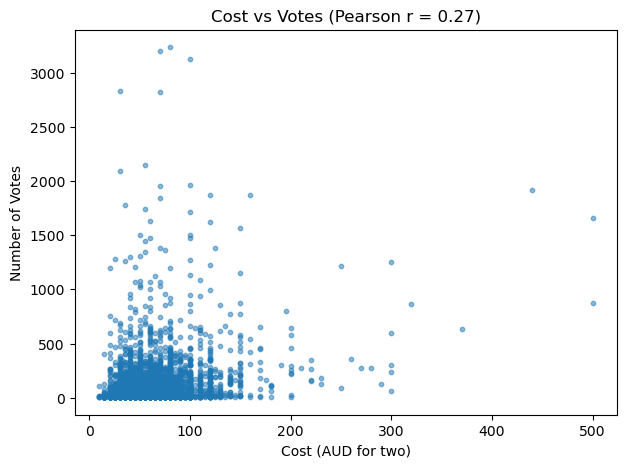

In [137]:
# Scatter plot with correlation
corr = df[["cost", "votes"]].dropna().corr().iloc[0,1]

plt.figure(figsize=(7,5))
plt.scatter(df["cost"], df["votes"], alpha=0.5, s=10)
plt.title(f"Cost vs Votes (Pearson r = {corr:.2f})")
plt.xlabel("Cost (AUD for two)")
plt.ylabel("Number of Votes")
plt.show()


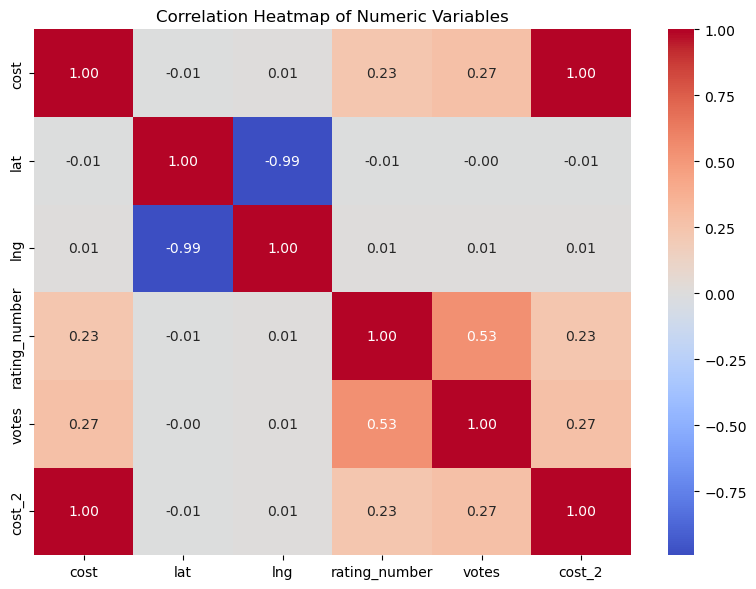

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    cmap="coolwarm",       # color scheme
    center=0,              # center at 0
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()


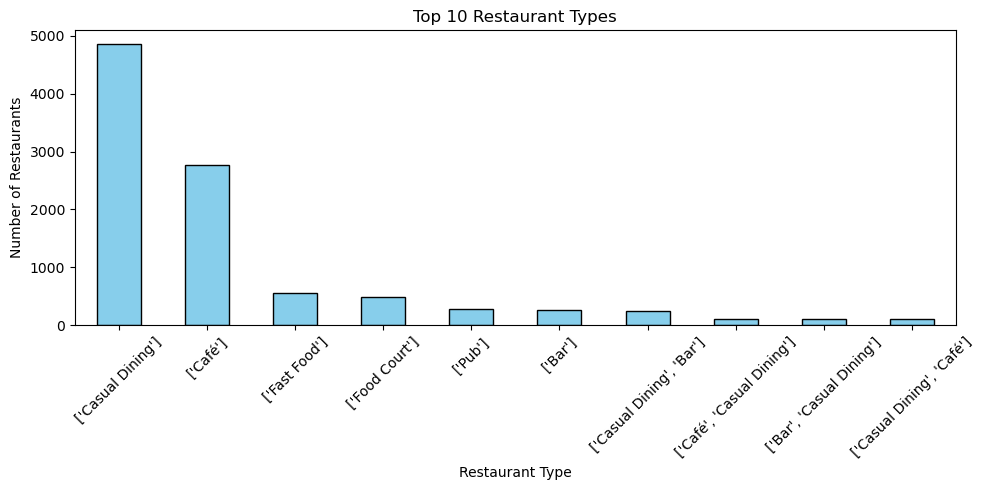

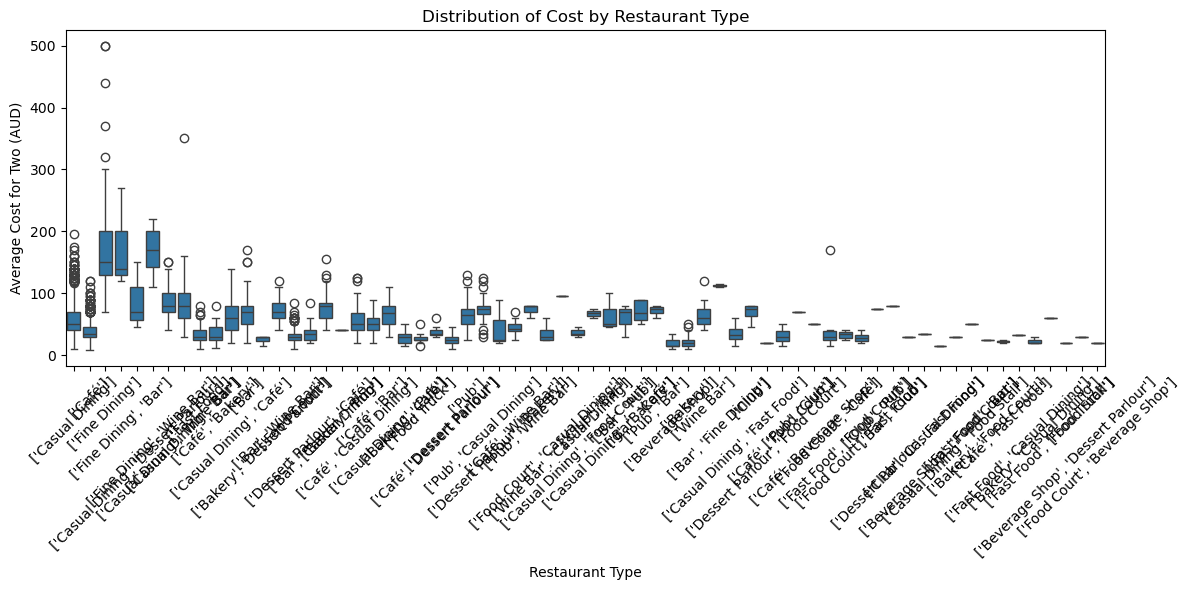

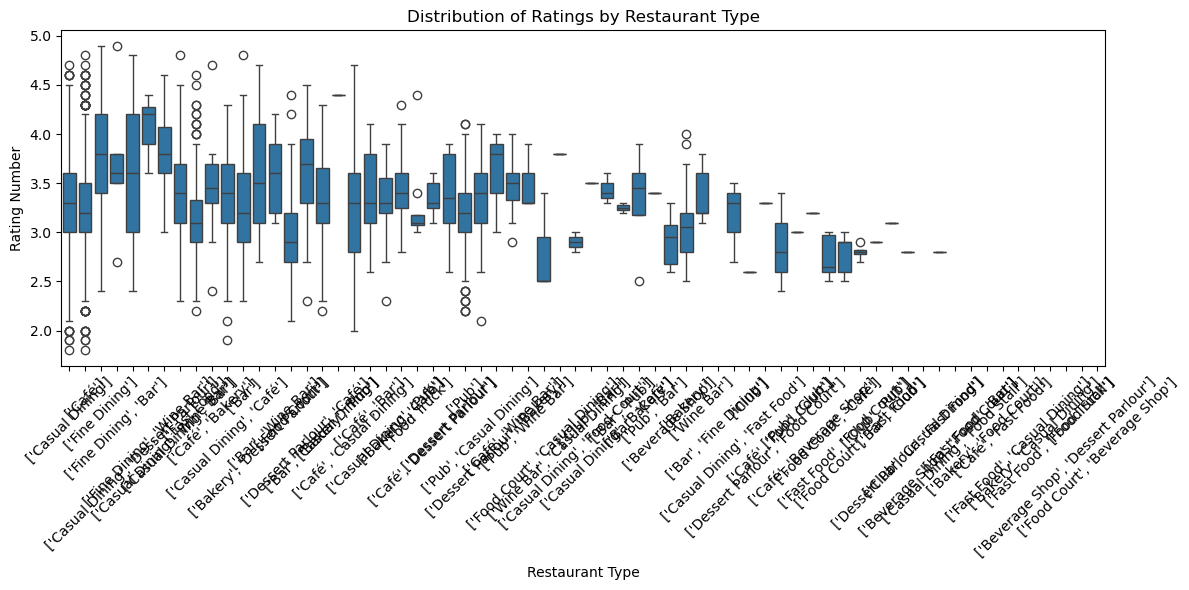

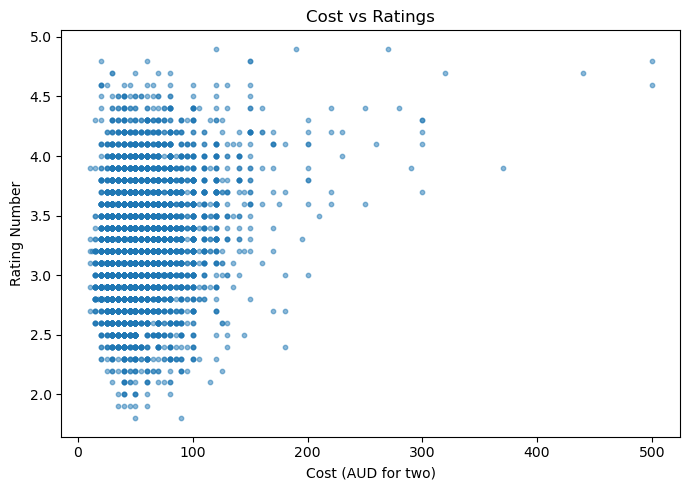

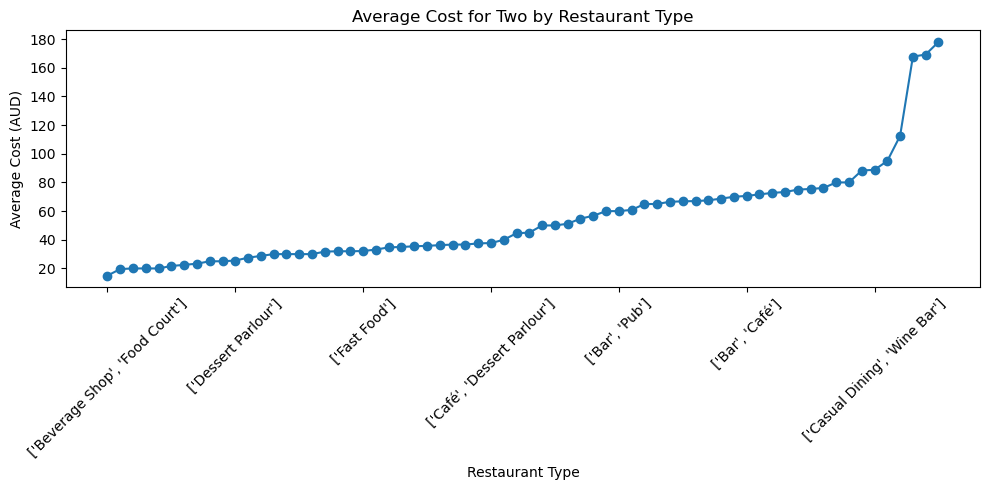

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df["type"].value_counts().head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Restaurant Types")
plt.xlabel("Restaurant Type")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="type", y="cost")
plt.title("Distribution of Cost by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost for Two (AUD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="type", y="rating_number")
plt.title("Distribution of Ratings by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Rating Number")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(7,5))
plt.scatter(df["cost"], df["rating_number"], alpha=0.5, s=10)
plt.title("Cost vs Ratings")
plt.xlabel("Cost (AUD for two)")
plt.ylabel("Rating Number")
plt.tight_layout()
plt.show()


avg_cost_by_type = df.groupby("type")["cost"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_cost_by_type.plot(kind="line", marker="o")
plt.title("Average Cost for Two by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost (AUD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights:

- **Distribution of Cost:**

    - The histogram shows a right-skewed distribution:
    - Most restaurants fall in the 30–70 AUD range.
    - Very few luxury restaurants exceed 200–500 AUD, but they exist as outliers.

Suggests Sydney’s dining scene is mostly affordable to mid-range, with a small cluster of fine dining.

- **Distribution of Ratings**

    - Ratings cluster around 3.0–4.0.
    - Very few restaurants have extremely low (<2.5) or extremely high (>4.5) ratings.

This indicates a central tendency, most places are rated “average to good”, with a bias toward positive reviews.

- **Restaurant Types**

    - Casual Dining and Cafe dominate significantly, followed by Fast Food, Food Courts, Pubs, and Bars.
    - Specialty categories (Fine Dining, Dessert Parlours, Wine Bars) are much smaller in count.

This reflects that Sydney has a strong casual food culture.

- **Cost by Restaurant Type (Box Plot)**

    - Fine Dining and Wine Bars show much higher median costs and wide spreads.
    - Casual Dining has a large spread, covering both cheap and expensive restaurants.

Fast Food and Food Courts consistently sit at the low-cost end.

- **Ratings by Restaurant Type (Box Plot)**

    - Some types (e.g., Fine Dining, Cafés) tend to cluster at higher ratings.
    - Fast Food and Food Court ratings are slightly lower and more variable.

Suggests premium venues maintain better reputations.

- **Cost vs Votes (Scatter)**

    - Weak positive correlation (r ≈ 0.27):
    - Higher-cost restaurants tend to attract more votes, but not strongly.
    - Some cheap eateries still attract thousands of votes (likely famous cafes or fast-food chains).

Popularity depends not only on price but also location and reputation.

- **Cost vs Ratings (Scatter)**

    - No strong correlation: expensive restaurants don’t always guarantee higher ratings.
    - There are both high-cost/low-rated and low-cost/high-rated restaurants.

Suggests customers judge value for money rather than just absolute cost.

- **Correlation Heatmap**

    - Cost & Cost_2: Perfect correlation (Cost_2 is a transformed version of cost).
    - Votes & Ratings: Moderately positive correlation (~0.53) → restaurants with more votes tend to also have slightly higher ratings.
    - Lat & Lng: Strong negative correlation (-0.99) → geographic coordinates are consistent, but also show possible outliers.
    - Cost vs Votes: Weak correlation (~0.27), consistent with the scatter.

Overall, it is seen that Casual dining dominates Sydney’s food scene, both in volume and price diversity. Most restaurants are mid-priced and rated average to good, with a few standout luxury or budget options. Votes don’t depend only on price, cheap cafes and fast-food chains can be just as popular as expensive fine dining. Ratings are kind of centralized (around 3–4), with few extreme values.

## Geospatial Analysis
#### Q1. Use sydney.geojson (attached) and geopandas library to show cuisine density per suburb. 


In [140]:
import json
import pandas as pd
import geopandas as gpd
import plotly.express as px

CSV_PATH = "./Dataset/zomato_df_final_data.csv"
GEOJSON_PATH = "./Dataset/sydney.geojson"
SELECTED_CUISINE = "thai"

# 1) Load restaurants and prep cuisine tokens (robust to quotes/brackets)
use_cols = ["lat", "lng", "cuisine"]
df = pd.read_csv(CSV_PATH, usecols=use_cols)

df["cuisine_clean"] = (
    df["cuisine"].fillna("").astype(str)
      .str.replace(r"[\[\]\u2018\u2019\u201C\u201D'\"']", "", regex=True)
      .str.lower().str.strip()
)

tok = df[["lat", "lng", "cuisine_clean"]].copy()
tok["cuisine_token"] = tok["cuisine_clean"].str.split(",")
tok = tok.explode("cuisine_token")
tok["cuisine_token"] = tok["cuisine_token"].astype(str).str.strip()

# keep valid coords within Greater Sydney-ish bounds
tok = tok[(tok["cuisine_token"] != "") & tok["lat"].notna() & tok["lng"].notna()]
tok = tok[
    tok["lat"].between(-34.3, -33.3) &
    tok["lng"].between(150.4, 151.6)
]

# filter selected cuisine (exact token, case-insensitive)
mask = tok["cuisine_token"].str.casefold().eq(SELECTED_CUISINE.casefold())
tok_sel = tok[mask].copy()
print("Matched rows for", SELECTED_CUISINE, ":", tok_sel.shape[0])

Matched rows for thai : 674


In [141]:
tok

,lat,lng,cuisine_clean,cuisine_token
0,-33.876059,151.207605,"hot pot, korean bbq, bbq, korean",hot pot
0,-33.876059,151.207605,"hot pot, korean bbq, bbq, korean",korean bbq
0,-33.876059,151.207605,"hot pot, korean bbq, bbq, korean",bbq
0,-33.876059,151.207605,"hot pot, korean bbq, bbq, korean",korean
1,-33.910999,151.193793,"cafe, coffee and tea, salad, poké",cafe
...,...,...,...,...
10494,-33.713108,151.146839,sandwich,sandwich
10495,-33.808653,150.972147,chinese,chinese
10496,-33.922147,151.078400,beverages,beverages
10497,-33.726993,150.725143,sushi,sushi


#### Q2. Colour each suburb by the number of restaurants serving a given cuisine.

In [142]:
# Build points GeoDataFrame and load polygons
restaurants = gpd.GeoDataFrame(
    tok_sel,
    geometry=gpd.points_from_xy(tok_sel["lng"], tok_sel["lat"]),
    crs="EPSG:4326"
)

gdf = gpd.read_file(GEOJSON_PATH)
if gdf.crs is None:
    gdf = gdf.set_crs("EPSG:4326")
else:
    gdf = gdf.to_crs("EPSG:4326")

# fix invalid polygons if any
try:
    gdf["geometry"] = gdf.buffer(0)
except Exception:
    pass


In [143]:
# Spatial join then count per polygon
joined = gpd.sjoin(restaurants, gdf, how="left", predicate="intersects")  
counts = joined.groupby("index_right").size().rename("count").reset_index()
gjoin = gdf.join(counts.set_index("index_right"), how="left")
gjoin["count"] = gjoin["count"].fillna(0).astype(int)

print("Polygons with count > 0:", int((gjoin["count"] > 0).sum()), "of", gjoin.shape[0])


Polygons with count > 0: 207 of 494


In [ ]:
# Get one point per polygon to place bubbles (centroid/representative_point)
reps = gjoin.geometry.representative_point()
gjoin["lat_rep"] = reps.y
gjoin["lng_rep"] = reps.x
hover_col = "SSC_NAME"

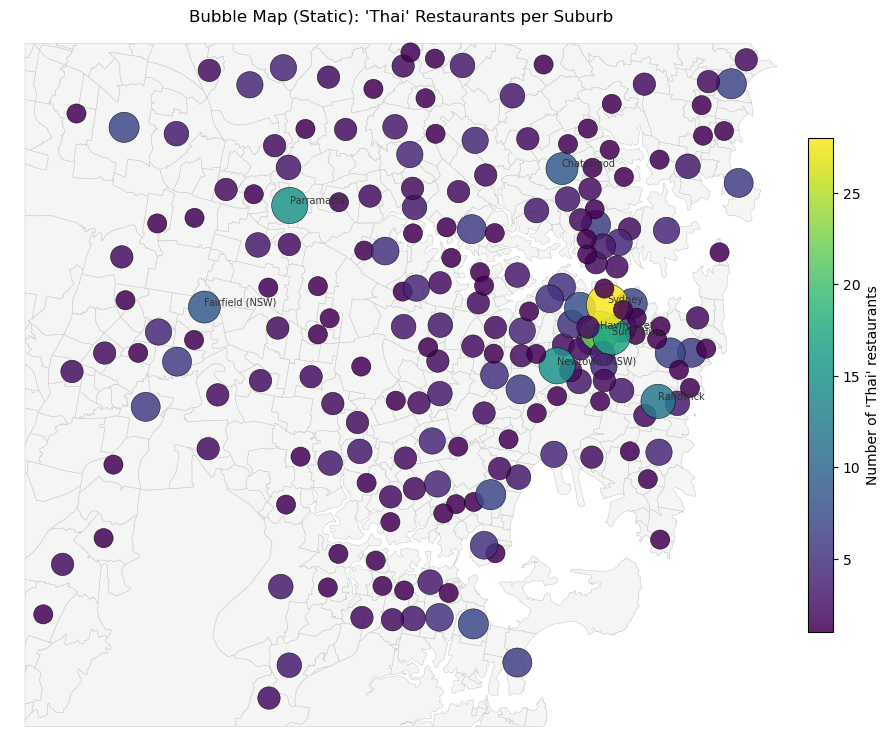

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Keep only suburbs with at least one restaurant for the chosen cuisine
nonzero = gjoin[gjoin["count"] > 0].copy()

# Bubble sizes
max_count = max(1, int(nonzero["count"].max()))
sizes = 20 + (np.sqrt(nonzero["count"] / max_count) * 900)  # 20..~920 points^2

# Color mapping
norm_min, norm_max = 0, gjoin["count"].max()
cmap = "viridis"

# Plot
fig, ax = plt.subplots(figsize=(9,9))

# Base polygons 
gjoin.plot(ax=ax, facecolor="#f5f5f5", edgecolor="#cccccc", linewidth=0.4)

# Bubble layer at representative points
sc = ax.scatter(
    nonzero["lng_rep"], nonzero["lat_rep"],
    s=sizes,
    c=nonzero["count"],
    cmap=cmap,
    alpha=0.85,
    edgecolors="black",
    linewidths=0.4
)

# Colorbar
cbar = plt.colorbar(sc, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label(f"Number of '{SELECTED_CUISINE.title()}' restaurants")

# label the top N suburbs
N = 8
label_col = "SSC_NAME" if "SSC_NAME" in gjoin.columns else None
if label_col is not None:
    topN = nonzero.nlargest(N, "count")
    for _, r in topN.iterrows():
        ax.text(r["lng_rep"], r["lat_rep"], str(r[label_col]),
                fontsize=7, ha="left", va="bottom", color="#333333")

ax.set_title(f"Bubble Map (Static): '{SELECTED_CUISINE.title()}' Restaurants per Suburb")
ax.set_axis_off()

# tighten to data bounds with a small padding
minx, miny, maxx, maxy = gjoin.total_bounds
dx = (maxx - minx) * 0.02
dy = (maxy - miny) * 0.02
ax.set_xlim(minx - dx, maxx + dx)
ax.set_ylim(miny - dy, maxy + dy)

plt.tight_layout()
plt.show()


## Interactive Visualisation

### Choose one insight where static plots are limiting

### Ans:
The cuisine density insight lives in where the restaurants are and how many there are, the map must let users inspect, compare, and verify—all things static images do poorly in dense urban geography with skewed counts. Interactive maps solve those limitations by offering zoom/pan, tooltips, and quick variable switches, turning your visualization into a genuine exploratory instrument.

An interactive map is the right choice for the cuisine density by suburb insight. Because:
- Inner-city Sydney has many tiny, adjacent areas. On a static map, shapes and labels aren't clearr and collide. We face difficulty in reading suburb names or seeing which polygon is slightly darker. Interactivity resolves this issue.

- Cuisine counts are sparse (only 207 of 494 polygons > 0) with a few hotspots. Static maps force one fixed color scale that either hides low counts or crushes the highs. With interactivity users can dynamically inspect ranges.

- Hovering allows exposures of precise counts and suburb names without crowding the canvas with text.

- In EDA, the goal is to ask and answer new questions quickly (e.g., “Why is Parramatta a hotspot for Thai but not for Sushi?”). Interactivity turns a single figure into a lightweight analysis tool rather than a final, fixed picture.

### Recreate it using Plotly and explain why the interactive version is better

In [ ]:
hover_col = "SSC_NAME"

In [ ]:
# Interactive BUBBLE MAP 
fig = px.scatter_mapbox(
    gjoin,
    lat="lat_rep",
    lon="lng_rep",
    size="count",
    color="count",
    size_max=30,
    color_continuous_scale="Viridis",
    hover_name=hover_col,
    hover_data={"count": True, "lat_rep": False, "lng_rep": False},
    title=f"Bubble Map: '{SELECTED_CUISINE.title()}' Restaurants per Suburb (Spatial Join)",
    zoom=8,
    center={"lat": -33.8688, "lon": 151.2093},
    height=650
)

# 'open-street-map' does NOT require a Mapbox token
fig.update_layout(mapbox_style="open-street-map", margin=dict(l=0, r=0, t=60, b=0))
fig.show()
